In [1]:
import numpy as np; np.set_printoptions(suppress=True, linewidth=180)
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
NSS = 200
B = 0.4
D = 0.4
pop_val = np.linspace(0, 400, 10001)
K_val = [0.1, 0.2, 0.4, 0.8] # birth and death rates

##  STRENGTH OF RETURN FORCE
def return_strength(pop, c, B = 0.4, D = 0.4):
    return (pop*(max(0, B+(c*(NSS-pop)))-D))

C_val = sequence = [round(i * 10**-decimals, 14) for decimals in range(3, 5) for i in range(10, 0, -1)]
C_val = [element for i, element in enumerate(C_val) if i % 5 == 0] # sparseify for testing
C_val.append(0.0001)
C_val.append(0.00001)

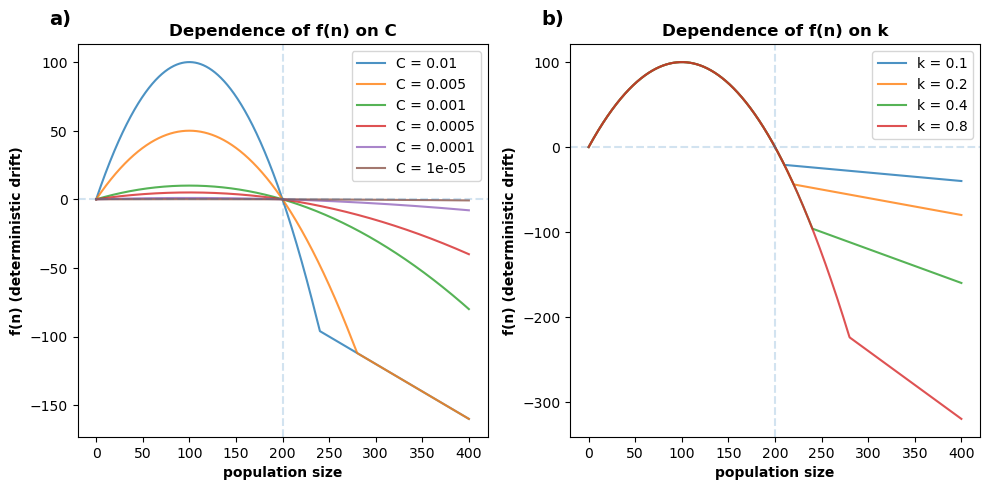

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create 1 row and 2 columns of subplots with a specified figure size

for C in C_val:
    net_change = np.array([return_strength(pop, C) for pop in pop_val])
    axs[0].plot(pop_val, net_change, label = f'C = {C}', alpha = 0.8)

axs[0].axhline(0, alpha = 0.2, linestyle = 'dashed')
axs[0].axvline(NSS, alpha = 0.2, linestyle = 'dashed')

axs[0].set_xlabel('population size', weight = 'bold')
axs[0].set_ylabel('f(n) (deterministic drift)', weight = 'bold')
axs[0].set_title('Dependence of f(n) on C', weight = 'bold')
axs[0].text(-0.07, 1.05, 'a)', transform=axs[0].transAxes, fontsize=14, fontweight='bold')
axs[0].legend()



for K in K_val:
    net_change = np.array([return_strength(pop, 0.01, B = K, D = K) for pop in pop_val])
    plt.plot(pop_val, net_change, label = f'k = {K}', alpha = 0.8)

    
axs[1].axhline(0, alpha = 0.2, linestyle = 'dashed')
axs[1].axvline(NSS, alpha = 0.2, linestyle = 'dashed')

axs[1].set_xlabel('population size', weight = 'bold')
axs[1].set_ylabel('f(n) (deterministic drift)', weight = 'bold')
axs[1].set_title('Dependence of f(n) on k', weight = 'bold')
axs[1].text(-0.07, 1.05, 'b)', transform=axs[1].transAxes, fontsize=14, fontweight='bold')
axs[1].legend()

plt.tight_layout()
plt.show()

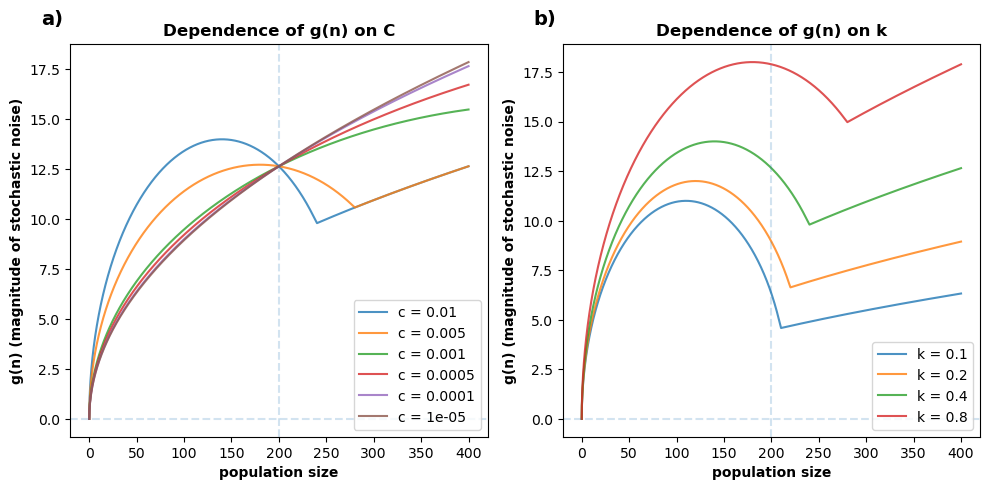

In [27]:
## STRENGTH OF NOISE TERM
def noise_strength(pop, c, B = 0.4, D = 0.4):
    return np.sqrt(pop*(max(0, B+(c*(NSS-pop)))+D))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create 1 row and 2 columns of subplots with a specified figure size

for C in C_val:
    net_change = np.array([noise_strength(pop, C) for pop in pop_val])
    axs[0].plot(pop_val, net_change, label = f'c = {C}', alpha = 0.8)

axs[0].axhline(0, alpha = 0.2, linestyle = 'dashed')
axs[0].axvline(NSS, alpha = 0.2, linestyle = 'dashed')

axs[0].set_title('Dependence of g(n) on C', weight = 'bold')
axs[0].set_xlabel('population size', weight = 'bold')
axs[0].set_ylabel('g(n) (magnitude of stochastic noise)', weight = 'bold')
axs[0].text(-0.07, 1.05, 'a)', transform=axs[0].transAxes, fontsize=14, fontweight='bold')
axs[0].legend()

for K in K_val:
    net_change = np.array([noise_strength(pop, 0.01, B = K, D = K) for pop in pop_val])
    axs[1].plot(pop_val, net_change, label = f'k = {K}', alpha = 0.8)

axs[1].axhline(0, alpha = 0.2, linestyle = 'dashed')
axs[1].axvline(NSS, alpha = 0.2, linestyle = 'dashed')

axs[1].set_title('Dependence of g(n) on k', weight = 'bold')
axs[1].set_xlabel('population size', weight = 'bold')
axs[1].set_ylabel('g(n) (magnitude of stochastic noise)', weight = 'bold')
axs[1].text(-0.07, 1.05, 'b)', transform=axs[1].transAxes, fontsize=14, fontweight='bold')
axs[1].legend()

plt.tight_layout()
plt.show()

340.0
303.0
301.0
301.0
301.0
301.0


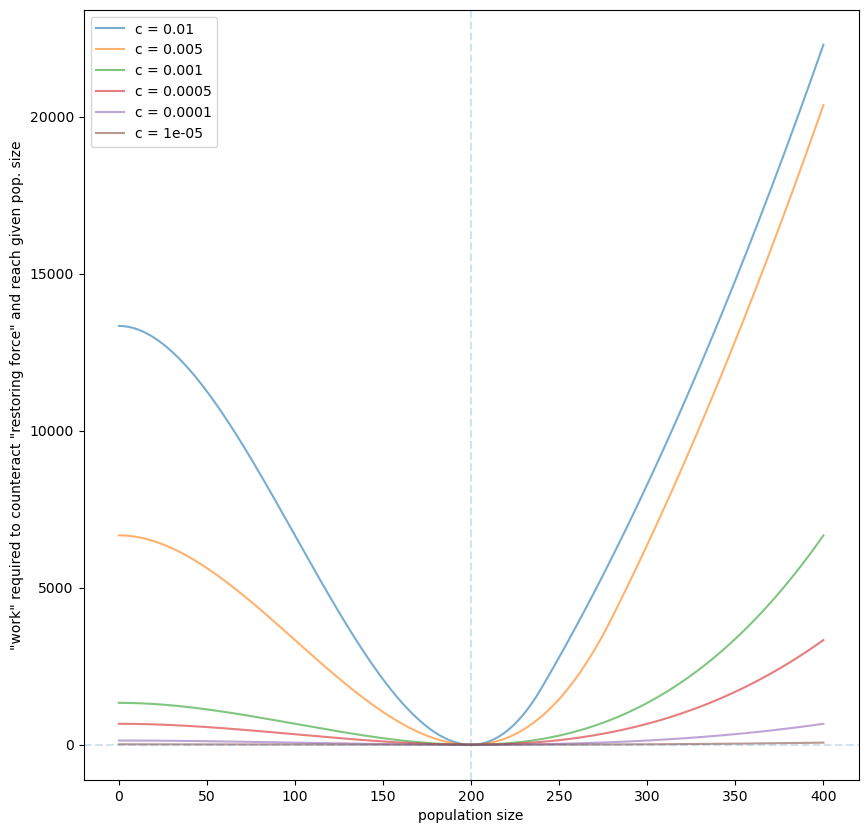

In [20]:
pop_val = np.linspace(0, 400, 10001)
center_i = np.where(pop_val == NSS)[0][0]
for C in C_val:
    abs_net_change = np.array([abs(return_strength(pop, C)) for pop in pop_val])
    positive_integral = [np.trapz(abs_net_change[center_i:i], pop_val[center_i:i]) for i in range(center_i, len(pop_val))]
    negative_integral = np.array([np.trapz(-abs_net_change[(center_i-i):center_i][::-1], pop_val[(center_i-i):center_i][::-1]) for i in range(0, center_i)])[::-1]
    integral = list(negative_integral)
    integral.extend(positive_integral)
    
    pos = 0
    for pot, pop in zip(integral, pop_val):
        if pot > integral[0] and pop %1 == 0:
            print(pop)
            break
    
    plt.plot(
        pop_val, 
        integral, 
        label = f'c = {C}', alpha = 0.6)

plt.axhline(0, alpha = 0.2, linestyle = 'dashed')
plt.axvline(NSS, alpha = 0.2, linestyle = 'dashed')
plt.xlabel('population size')
plt.ylabel('"work" required to counteract "restoring force" and reach given pop. size')
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()